# Import package and dataset

In [60]:
from sklearn import svm, datasets, metrics 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [61]:
# import data
from sklearn.datasets import load_iris  
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [62]:
#look keys
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [63]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [64]:
iris.data.shape

(150, 4)

In [65]:
#150 data，4 features，float dataframe

#look feature's name
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [66]:
#look target and namw
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [67]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [68]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# Read dataset and save as dataframe type

In [69]:
# data_pd = pd.read_csv(iris.filename)
data_pd.rename(columns = {'150':'sepal length (cm)','4':'sepal width (cm)','setosa':'petal length (cm)','versicolor':'petal width (cm)','virginica':'kind'},inplace = True)
data_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kind
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Divide train and test 

divide into: x_train, x_test, y_train, y_test  

In [70]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=1, stratify=iris.target)

# data reduction

In [71]:
ss = StandardScaler()
ss.fit(x_train)
x_train_std = ss.transform(x_train)
x_test_std = ss.transform(x_test) # 测试集需要和训练集标准化的方法一致

In [72]:
x_train_std

array([[ 0.5516363 ,  0.78411646,  1.02361578,  1.57858012],
       [ 0.5516363 ,  0.55865166,  1.24600666,  1.70928133],
       [ 2.09200497, -0.11774273,  1.57959297,  1.1864765 ],
       [ 1.02559589,  0.55865166,  1.0792135 ,  1.1864765 ],
       [ 0.31465651, -1.01960191,  1.02361578,  0.27156806],
       [ 2.21049487, -1.01960191,  1.74638613,  1.44787891],
       [ 2.21049487,  1.68597564,  1.63519069,  1.31717771],
       [-1.34420206,  0.33318686, -1.20029298, -1.29684641],
       [-0.04081319, -0.56867232,  0.74562719,  1.57858012],
       [-0.04081319, -0.79413711,  0.74562719,  0.92507409],
       [ 0.07767671, -0.11774273,  0.24524772,  0.40226927],
       [-1.34420206,  0.33318686, -1.36708613, -1.29684641],
       [-0.15930308, -0.34320752,  0.24524772,  0.14086686],
       [-0.98873237,  0.33318686, -1.42268385, -1.29684641],
       [ 0.19616661, -0.34320752,  0.41204087,  0.40226927],
       [ 0.19616661, -0.11774273,  0.57883403,  0.79437288],
       [-0.87024247,  1.

In [73]:
np.mean(x_train_std)

-2.0724163126336256e-16

In [74]:
np.var(x_train_std)

0.9999999999999999

# Model Training: SVM

In [75]:
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, validation_curve

# validation_curve

In [76]:
param_range = [0.01, 0.1, 1, 10.0, 100.0,1000.0]

In [91]:
def plot_validation_curve(estimator, X, y, ylim, cv=None, param_name=None, param_range=param_range):
    train_scores, test_scores = validation_curve(estimator=estimator,X=X, y=y,param_name=param_name,param_range=param_range,cv=cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, marker='o', markersize=5, label='training accuracy')
    plt.fill_between(param_range, train_mean+train_std, train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(param_range, test_mean,marker='s', markersize=5, label='validation accuracy')
    plt.fill_between(param_range, test_mean+test_std, test_mean-test_std,alpha=0.15,color='green')
    plt.grid()
    plt.xscale('log')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim(ylim)
    plt.title('validation curve')
    plt.show()

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


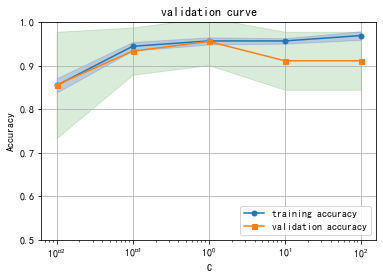

In [92]:
plot_validation_curve(estimator=svm_clf, X=x_train_std, y=y_train, ylim=[0.5,1],param_name='C', param_range=param_range, cv=10)

# learning curve

In [89]:
def plot_learning_curve(estimator, X, y, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(0.1,1.0,10), verbose=0):
    train_sizes, train_scores, test_scores = learning_curve(estimator=estimator, X=X, y=y, cv=cv, n_jobs=n_jobs,train_sizes=train_sizes)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, marker='o', markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(train_sizes, test_mean, marker='s', markersize=5, label='validation accuracy')
    plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std,alpha=0.15,color='green')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.ylim([0.5, 1.0])
    plt.xlim([train_sizes.min(), train_sizes.max()])
    plt.title('learning curve')
    plt.show()

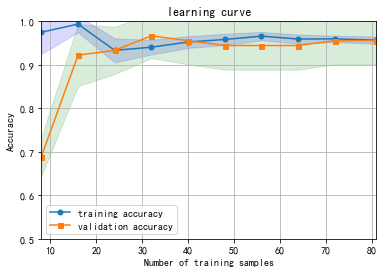

In [90]:
plot_learning_curve(estimator=svm_clf, X=x_train_std, y=y_train, cv=10, train_sizes=np.linspace(0.1,1.0,10))

# Nested cross-validation

In [81]:
svm_clf = svm.SVC(random_state=1)
param_range = [0.01, 0.1, 1, 10.0, 100.0]
param_grid = [{'C': param_range, 'kernel': ['linear']},
            {'C': param_range, 'kernel': ['rbf'], 'gamma':param_range}]
GSsvm=GridSearchCV(estimator=svm_clf, param_grid=param_grid, scoring='accuracy',cv=10) # GridSearchCV

best_score = GSsvm.fit(x_train_std, y_train).best_score_
best_params = GSsvm.fit(x_train_std, y_train).best_params_
print('best_score = ',best_score,'best_params = ', best_params)

scores_svm=cross_val_score(GSsvm,x_train_std,y_train,scoring='accuracy',cv=5)# Nested cross-validation
print(scores_svm,np.mean(scores_svm),np.var(scores_svm))

best_score =  0.9555555555555556 best_params =  {'C': 1, 'kernel': 'linear'}
[0.94444444 0.94444444 0.94444444 1.         0.94444444] 0.9555555555555555 0.0004938271604938276


In [82]:
svm_clf.get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [83]:
model=GSsvm.fit(x_train_std, y_train)
pred=model.predict(x_test_std)
pred

array([0, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0,
       2, 0, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0,
       2, 2, 1, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1])

# ROC curve 

In [84]:
from sklearn.preprocessing import label_binarize
from sklearn import metrics
import matplotlib as mpl

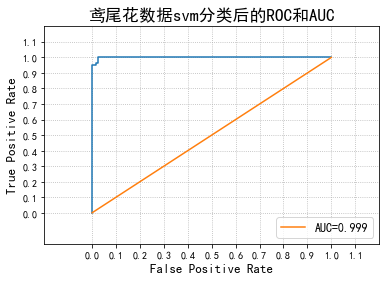

In [85]:
svm_clf = svm.SVC(random_state=1, C = 1, kernel= 'linear',probability = True)
# 多分类问题的ROC曲线，分类标签要编码
y_one_hot = label_binarize(y_test, np.arange(3))
model=svm_clf.fit(x_train_std, y_train)
y_score=model.predict_proba(x_test_std)
metrics.roc_auc_score(y_one_hot, y_score, average='micro')
fpr, tpr, thresholds = metrics.roc_curve(y_one_hot.ravel(),y_score.ravel())
auc = metrics.auc(fpr, tpr)
#绘图
mpl.rcParams['font.sans-serif'] = u'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
 #FPR就是横坐标,TPR就是纵坐标
plt.plot(fpr, tpr)
plt.plot((0, 1), (0, 1), label = u'AUC=%.3f' % auc)
plt.xlim((-0.2, 1.2))
plt.ylim((-0.2, 1.2))
plt.xticks(np.arange(0, 1.2, 0.1),label = u'AUC=%.3f' % auc)
plt.yticks(np.arange(0, 1.2, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'鸢尾花数据svm分类后的ROC和AUC', fontsize=17)
plt.show()